# Scaling Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

import env
import wrangle 

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedrooms,bathrooms,sq_ft,home_value,year_built,location
0,4,2.0,3633,296425,2005,LA County
1,3,4.0,1620,847770,2011,LA County
2,3,2.0,2077,646760,1926,LA County
3,0,0.0,1200,5328,1972,LA County
4,0,0.0,171,6920,1973,LA County


In [4]:
df.location.tolist()

['LA County',
 'LA County',
 'LA County',
 'LA County',
 'LA County',
 'LA County',
 'LA County',
 'LA County',
 'LA County',
 'LA County',
 'Orange County',
 'Orange County',
 'Orange County',
 'Orange County',
 'Orange County',
 'Orange County',
 'Orange County',
 'Orange County',
 'Orange County',
 'Orange County',
 'Orange County',
 'Orange County',
 'Orange County',
 'LA County',
 'LA County',
 'LA County',
 'LA County',
 'LA County',
 'LA County',
 'Orange County',
 'Orange County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura County',
 'Ventura Co

In [5]:
df.location.info()

<class 'pandas.core.series.Series'>
Int64Index: 2094583 entries, 0 to 2094582
Series name: location
Non-Null Count    Dtype 
--------------    ----- 
2094583 non-null  object
dtypes: object(1)
memory usage: 32.0+ MB


In [6]:
df.shape

(2094583, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094583 entries, 0 to 2094582
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    int64  
 1   bathrooms   float64
 2   sq_ft       int64  
 3   home_value  int64  
 4   year_built  int64  
 5   location    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 111.9+ MB


In [8]:
def split_zillow(df):
    train_validate, test = train_test_split(df, test_size=.2,
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3,
                                   random_state=123)
    return train, validate, test

In [9]:
train, validate, test = split_zillow(df)

In [10]:
train.head()

,bedrooms,bathrooms,sq_ft,home_value,year_built,location
410426,3,2.0,1550,357034,1961,LA County
533217,3,3.5,1800,287774,1996,Orange County
695362,3,2.0,1542,588738,1923,LA County
729442,3,1.0,1128,290984,1952,LA County
524897,0,1.0,396,34541,1942,LA County


In [11]:
x_train = train.drop(columns=['home_value', 'location'])

In [12]:
#Looking at the value counts for bathrooms
x_train['bathrooms'].value_counts()

2.00    526811
3.00    233221
1.00    230405
2.50     79651
4.00     41673
1.50     17419
3.50     14909
5.00     11602
4.50      9532
6.00      3073
0.00      2357
5.50      2301
0.50         9
1.75         3
Name: bathrooms, dtype: int64

In [13]:
#Create an arbitrary subset that's easier to work with
train_subset = x_train[x_train['bathrooms'] <= 8]

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution

In [14]:
# Assign the scaler to a variable, and fit/transform the training data
mms = sklearn.preprocessing.MinMaxScaler()

mms.fit(x_train)

train_mms = mms.transform(train_subset)

In [16]:
# Checking for mistakes:
pd.DataFrame(train_mms, columns=list(train_subset.columns)).head()


,bedrooms,bathrooms,sq_ft,year_built
0,0.5,0.333333,0.002916,0.744186
1,0.5,0.583333,0.003387,0.906977
2,0.5,0.333333,0.002901,0.567442
3,0.5,0.166667,0.002122,0.702326
4,0.0,0.166667,0.000744,0.655814


Text(0.5, 1.0, 'Scaled')

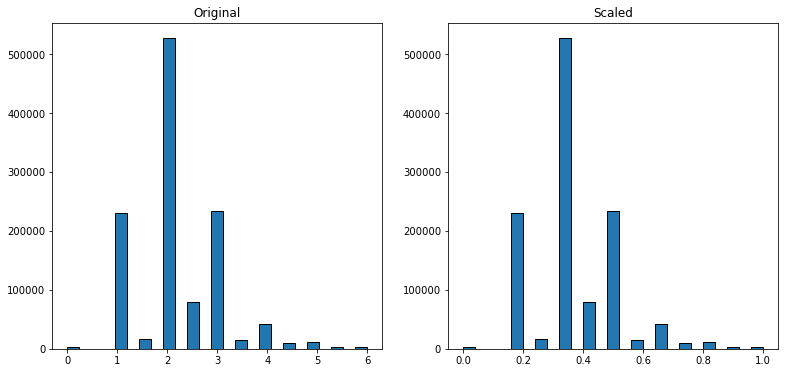

In [17]:
#Visualize the difference between unscaled/scaled data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bathrooms'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_mms[:,1], bins=25, ec='black')
plt.title('Scaled')

In [18]:
#Assign the standard scaler to a variable and fit/transform the train data
ss = sklearn.preprocessing.StandardScaler()

ss.fit(train_subset)

train_ss = ss.transform(train_subset)

Text(0.5, 1.0, 'Scaled')

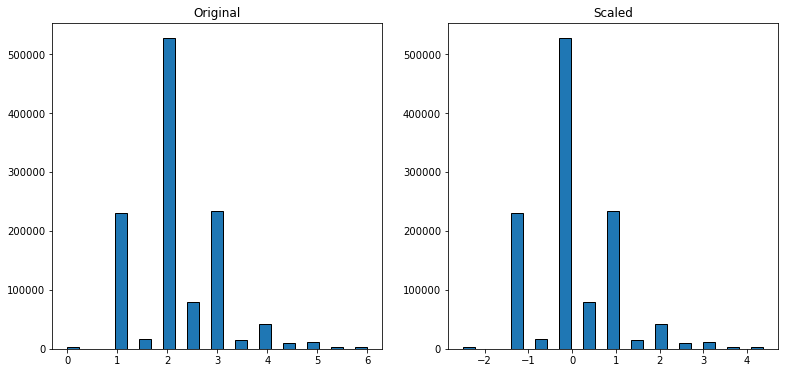

In [19]:
#Visualize the difference
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bathrooms'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_ss[:,1], bins=25, ec='black')
plt.title('Scaled')

In [20]:
#Assign the robust scaler to a variable and fit/transform the train data
rs = sklearn.preprocessing.RobustScaler()

rs.fit(train_subset)

train_rs = rs.transform(train_subset)

Text(0.5, 1.0, 'Scaled')

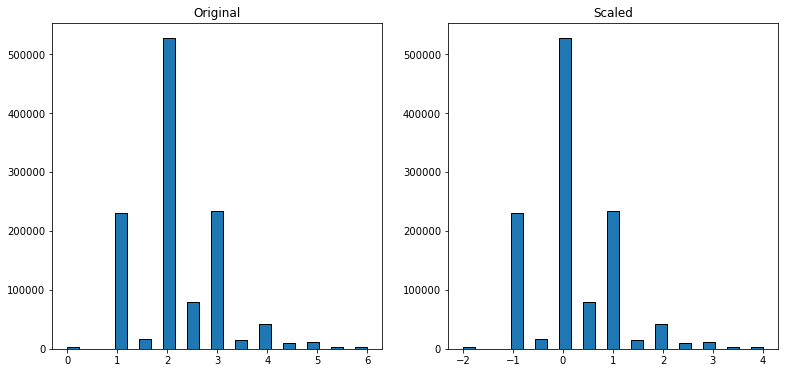

In [21]:
#Visualize the data before and after robust scaling
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bathrooms'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_rs[:,1], bins=25, ec='black')
plt.title('Scaled')

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [22]:
#Apply inverse_transform
rs.inverse_transform(train_rs)

array([[3.000e+00, 2.000e+00, 1.550e+03, 1.961e+03],
       [3.000e+00, 3.500e+00, 1.800e+03, 1.996e+03],
       [3.000e+00, 2.000e+00, 1.542e+03, 1.923e+03],
       ...,
       [3.000e+00, 2.000e+00, 1.755e+03, 1.944e+03],
       [3.000e+00, 1.000e+00, 1.188e+03, 1.947e+03],
       [4.000e+00, 2.500e+00, 2.045e+03, 1.989e+03]])

In [23]:
pd.DataFrame(rs.inverse_transform(train_rs))

,0,1,2,3
0,3.0,2.0,1550.0,1961.0
1,3.0,3.5,1800.0,1996.0
2,3.0,2.0,1542.0,1923.0
3,3.0,1.0,1128.0,1952.0
4,0.0,1.0,396.0,1942.0
...,...,...,...,...
1172961,3.0,2.5,2460.0,1966.0
1172962,2.0,1.5,1191.0,1987.0
1172963,3.0,2.0,1755.0,1944.0
1172964,3.0,1.0,1188.0,1947.0


In [24]:
#Compare to the original data
train_subset.head()

,bedrooms,bathrooms,sq_ft,year_built
410426,3,2.0,1550,1961
533217,3,3.5,1800,1996
695362,3,2.0,1542,1923
729442,3,1.0,1128,1952
524897,0,1.0,396,1942


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [26]:
#Assign the quantile transformer to a variable, and fit/transform the training data
qt = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

qt.fit(train_subset)

train_qt = qt.transform(train_subset)

Text(0.5, 1.0, 'Scaled')

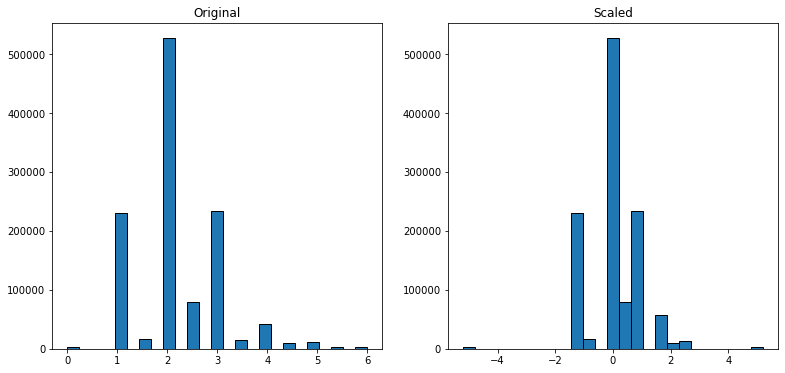

In [27]:
#Visualize the results of normalized quantile transformation
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bathrooms'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_qt[:,1], bins=25, ec='black')
plt.title('Scaled')

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [28]:
#Perform the same steps with the quantile transformer, this time without normalization
qt2 = sklearn.preprocessing.QuantileTransformer()

qt2.fit(train_subset)

train_qt2 = qt2.transform(train_subset)

Text(0.5, 1.0, 'Scaled')

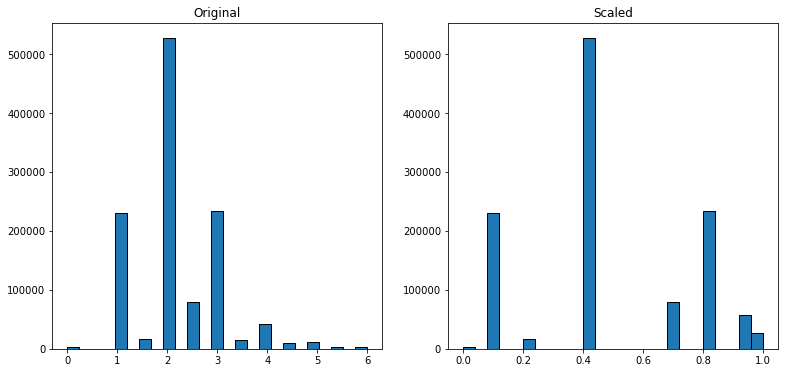

In [29]:
#Visualize the results
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bathrooms'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_qt2[:,1], bins=25, ec='black')
plt.title('Scaled')

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [30]:
#Import dependencies
from sklearn.preprocessing import MinMaxScaler

#Define function to scale all data based on the train subset
def scale_data(train, validate, test):
    
    scale_columns = ['bedrooms', 'bathrooms', 'sq_ft']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    mms = MinMaxScaler()
    
    mms.fit(train[scale_columns])
    
    train_scaled[scale_columns] = mms.transform(train[scale_columns])
    validate_scaled[scale_columns] = mms.transform(validate[scale_columns])
    test_scaled[scale_columns] = mms.transform(test[scale_columns])
    
    return train_scaled, validate_scaled, test_scaled

In [32]:
#Test my function
train_s, valid_s, test_s = scale_data(train, validate, test)

In [33]:
#See if the results make sense
train_s.head()

,bedrooms,bathrooms,sq_ft,home_value,year_built,location
410426,0.5,0.333333,0.002916,357034,1961,LA County
533217,0.5,0.583333,0.003387,287774,1996,Orange County
695362,0.5,0.333333,0.002901,588738,1923,LA County
729442,0.5,0.166667,0.002122,290984,1952,LA County
524897,0.0,0.166667,0.000744,34541,1942,LA County
